In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
from tqdm import tqdm
import gc
import collections 

#### Exploring the dataset and looking if the dataset could be generate biases in the model towards it.

#### Counting the Number of malicious and normal labels across all the 

In [2]:
parquet_dir = "/home/saurav/Desktop/Internship/Internship-Task/Major_Project/UNSW-NB15/Payload-Bytes-Modified/"
label_counter = collections.Counter()

In [4]:
#For multiclassification
for i,fname in enumerate(os.listdir(parquet_dir)):
    global label_counter
    file_path = os.path.join(parquet_dir,fname)
    if fname == "Payload_Bytes_File_6.parquet":
        continue
    file_parquet= pq.ParquetFile(file_path)
    print(f"Processing file:{i + 1} {fname}")
    for row in range(file_parquet.num_row_groups):
        row_data = file_parquet.read_row_group(row).to_pandas()
        label_counter.update(row_data['attack_type'])
            

Processing file:1 Payload_Bytes_File_3.parquet
Processing file:2 Payload_Bytes_File_4.parquet
Processing file:3 Payload_Bytes_File_18.parquet
Processing file:4 Payload_Bytes_File_14.parquet
Processing file:5 Payload_Bytes_File_1.parquet
Processing file:6 Payload_Bytes_File_15.parquet
Processing file:7 Payload_Bytes_File_9.parquet
Processing file:8 Payload_Bytes_File_8.parquet
Processing file:9 Payload_Bytes_File_7.parquet
Processing file:10 Payload_Bytes_File_17.parquet
Processing file:11 Payload_Bytes_File_12.parquet
Processing file:12 Payload_Bytes_File_5.parquet
Processing file:13 Payload_Bytes_File_10.parquet
Processing file:14 Payload_Bytes_File_2.parquet
Processing file:15 Payload_Bytes_File_11.parquet
Processing file:16 Payload_Bytes_File_13.parquet
Processing file:17 Payload_Bytes_File_16.parquet


In [6]:
label_counter

Counter({0: 41430383,
         1: 809614,
         2: 215577,
         4: 107569,
         3: 54697,
         5: 20484,
         8: 5626,
         6: 4952,
         9: 3624,
         7: 1510})

### Plotting the label across all the parquet files:

/tmp/ipykernel_1174926/42486958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='viridis')


Text(0.5, 0, 'Attack Type')

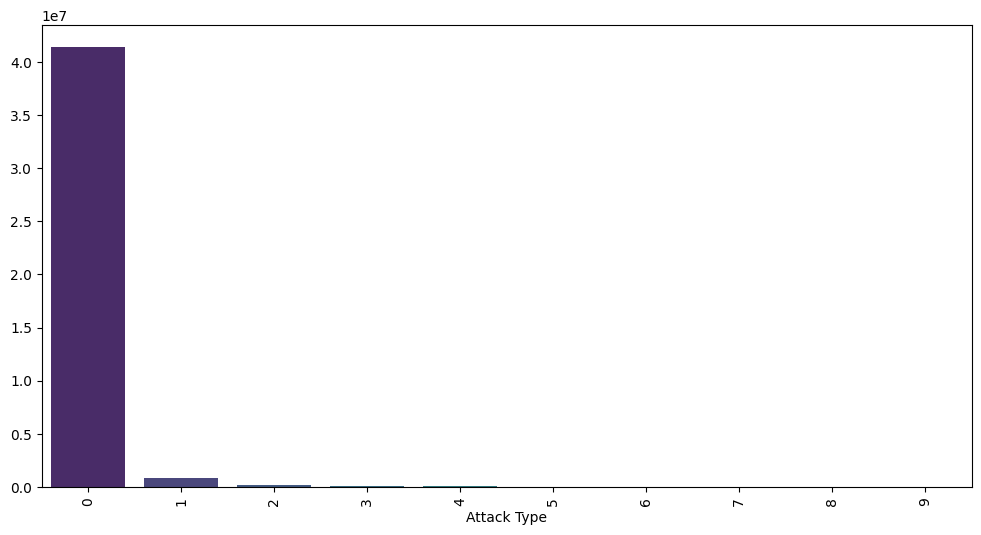

In [ ]:
labels = list(label_counter.keys())
counts = list(label_counter.values())
plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=counts, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Attack Type')   


In [14]:
label_counter


Counter({0: 41430383,
         1: 809614,
         2: 215577,
         4: 107569,
         3: 54697,
         5: 20484,
         8: 5626,
         6: 4952,
         9: 3624,
         7: 1510})

### So, the classes are hugely imbalanced. So, we need to perform some techniques for mitigating this unbalanced problem

## *Payload Length Distribution*

In [6]:
payload_lengths = []

for file in tqdm(os.listdir(parquet_dir)):
    file_path = os.path.join(parquet_dir,file)
    if file == "Payload_Bytes_File_6.parquet":
        continue
    file_parquet = pq.ParquetFile(file_path)
    print(f"Processing file: {file}")
    for row in range(file_parquet.num_row_groups):
        df = file_parquet.read_row_group(row).to_pandas()
        byte_columns = df.columns[df.columns.str.startswith("payload_byte_")]
        payload = df[byte_columns]
        lengths = (payload != 0).sum(axis=1)
        payload_lengths.extend(lengths.tolist())

  0%|          | 0/18 [00:00<?, ?it/s]

Processing file: Payload_Bytes_File_3.parquet


  6%|▌         | 1/18 [00:26<07:33, 26.69s/it]

Processing file: Payload_Bytes_File_4.parquet


 11%|█         | 2/18 [00:52<07:01, 26.36s/it]

Processing file: Payload_Bytes_File_18.parquet


 17%|█▋        | 3/18 [01:19<06:34, 26.30s/it]

Processing file: Payload_Bytes_File_14.parquet


 22%|██▏       | 4/18 [01:46<06:16, 26.86s/it]

Processing file: Payload_Bytes_File_1.parquet


 28%|██▊       | 5/18 [02:13<05:49, 26.92s/it]

Processing file: Payload_Bytes_File_15.parquet


 33%|███▎      | 6/18 [02:40<05:23, 26.94s/it]

Processing file: Payload_Bytes_File_9.parquet


 39%|███▉      | 7/18 [03:07<04:54, 26.78s/it]

Processing file: Payload_Bytes_File_8.parquet


 44%|████▍     | 8/18 [03:33<04:26, 26.66s/it]

Processing file: Payload_Bytes_File_7.parquet


 50%|█████     | 9/18 [04:00<04:01, 26.86s/it]

Processing file: Payload_Bytes_File_17.parquet


 56%|█████▌    | 10/18 [04:29<03:38, 27.34s/it]

Processing file: Payload_Bytes_File_12.parquet


 61%|██████    | 11/18 [04:56<03:11, 27.36s/it]

Processing file: Payload_Bytes_File_5.parquet


 67%|██████▋   | 12/18 [05:24<02:45, 27.58s/it]

Processing file: Payload_Bytes_File_10.parquet


 72%|███████▏  | 13/18 [05:52<02:17, 27.58s/it]

Processing file: Payload_Bytes_File_2.parquet


 78%|███████▊  | 14/18 [06:19<01:50, 27.58s/it]

Processing file: Payload_Bytes_File_11.parquet


 83%|████████▎ | 15/18 [06:46<01:22, 27.38s/it]

Processing file: Payload_Bytes_File_13.parquet


 89%|████████▉ | 16/18 [07:20<00:58, 29.39s/it]

Processing file: Payload_Bytes_File_16.parquet


100%|██████████| 18/18 [07:56<00:00, 26.47s/it]


In [4]:
payload_lengths.sort()

In [ ]:
payload_lengths

42654036

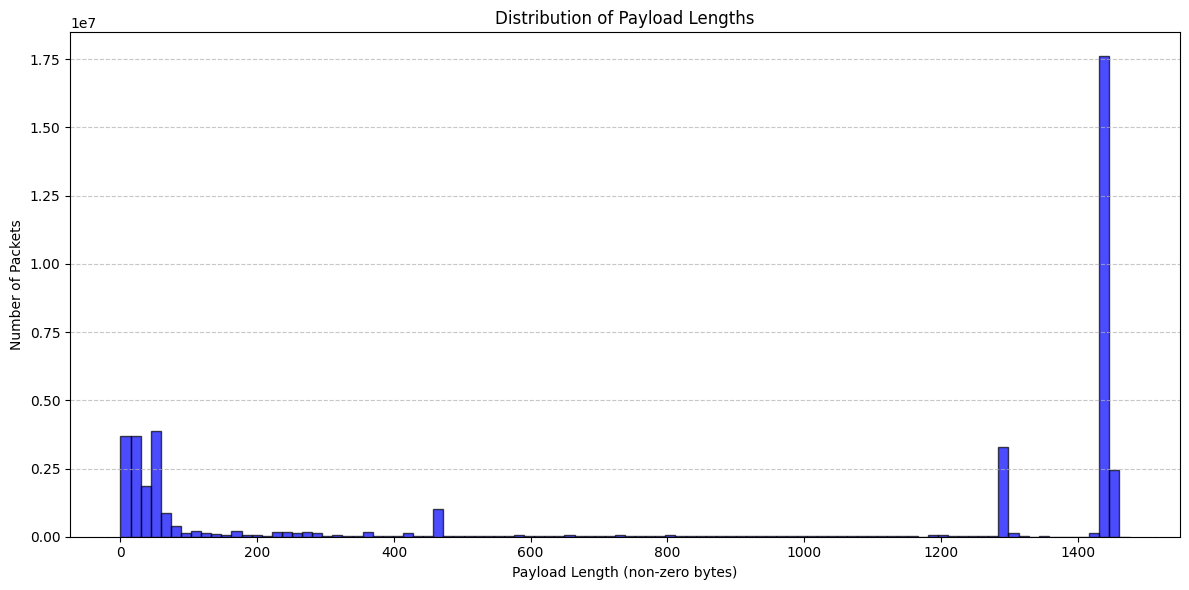

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(12,6))
plt.hist(payload_lengths, bins=100,color='blue', edgecolor='k',alpha=0.7)
plt.title("Distribution of Payload Lengths")
plt.xlabel("Payload Length (non-zero bytes)")
plt.ylabel("Number of Packets")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig("payload_lengths_distribution.png", dpi=300)

### Byte value frequency Patterns per Class

In [12]:
#Accumulators
byte_freq_per_class = collections.defaultdict(lambda:np.zeros(256,dtype=np.uint64))
class_sample_count = collections.defaultdict(int)

for file in tqdm(os.listdir(parquet_dir)):
    file_path = os.path.join(parquet_dir,file)
    if file == "Payload_Bytes_File_6.parquet":
        continue
    file_parquet = pq.ParquetFile(file_path)
    print(f"Processing file: {file}")
    for row in range(file_parquet.num_row_groups):
        df = file_parquet.read_row_group(row).to_pandas()

        label_col = df['attack_type']
        byte_columns = df.columns[df.columns.str.startswith("payload_byte_")]
        payload = df[byte_columns].values
        
        for label in np.unique(label_col):
            class_mask = label_col == label
            class_data = payload[class_mask]

            #Flatten and count byte values
            byte_counts = np.bincount(class_data.ravel(),minlength = 256).astype(np.uint64)
            byte_freq_per_class[label] += byte_counts
            class_sample_count[label] += class_data.shape[0]

  0%|          | 0/18 [00:00<?, ?it/s]

Processing file: Payload_Bytes_File_3.parquet


  6%|▌         | 1/18 [00:47<13:34, 47.94s/it]

Processing file: Payload_Bytes_File_4.parquet


 11%|█         | 2/18 [01:48<14:43, 55.25s/it]

Processing file: Payload_Bytes_File_18.parquet


 17%|█▋        | 3/18 [02:45<14:01, 56.10s/it]

Processing file: Payload_Bytes_File_14.parquet


 22%|██▏       | 4/18 [03:55<14:20, 61.43s/it]

Processing file: Payload_Bytes_File_1.parquet


 28%|██▊       | 5/18 [05:12<14:33, 67.21s/it]

Processing file: Payload_Bytes_File_15.parquet


 33%|███▎      | 6/18 [06:09<12:44, 63.74s/it]

Processing file: Payload_Bytes_File_9.parquet


 39%|███▉      | 7/18 [06:58<10:48, 58.94s/it]

Processing file: Payload_Bytes_File_8.parquet


 44%|████▍     | 8/18 [07:46<09:14, 55.42s/it]

Processing file: Payload_Bytes_File_7.parquet


 50%|█████     | 9/18 [08:34<07:59, 53.24s/it]

Processing file: Payload_Bytes_File_17.parquet


 56%|█████▌    | 10/18 [09:22<06:52, 51.53s/it]

Processing file: Payload_Bytes_File_12.parquet


 61%|██████    | 11/18 [10:10<05:53, 50.46s/it]

Processing file: Payload_Bytes_File_5.parquet


 67%|██████▋   | 12/18 [10:59<04:59, 49.91s/it]

Processing file: Payload_Bytes_File_10.parquet


 72%|███████▏  | 13/18 [11:47<04:07, 49.43s/it]

Processing file: Payload_Bytes_File_2.parquet


 78%|███████▊  | 14/18 [12:36<03:16, 49.17s/it]

Processing file: Payload_Bytes_File_11.parquet


 83%|████████▎ | 15/18 [13:24<02:26, 48.89s/it]

Processing file: Payload_Bytes_File_13.parquet


 89%|████████▉ | 16/18 [14:12<01:37, 48.75s/it]

Processing file: Payload_Bytes_File_16.parquet


100%|██████████| 18/18 [15:02<00:00, 50.15s/it]


In [15]:
# Normalize frequency by number of samples in each class

normalized_freq = {
    label:freq/class_sample_count[label]
    for label,freq in byte_freq_per_class.items()
}

#Convert to DataFrame for heatmap
df_byte_freq = pd.DataFrame(normalized_freq).T
df_byte_freq.columns = [f'byte_{i}' for i in range(256)]

In [16]:
df_byte_freq

,byte_0,byte_1,byte_2,byte_3,byte_4,byte_5,byte_6,byte_7,byte_8,byte_9,...,byte_246,byte_247,byte_248,byte_249,byte_250,byte_251,byte_252,byte_253,byte_254,byte_255
0,633.432948,3.595160,3.400704,3.265391,3.189778,3.080223,3.128002,3.072315,3.076042,3.120873,...,3.012034,3.072069,3.023270,3.054981,3.094784,3.073630,3.024400,3.101942,3.074930,3.829804
1,417.476782,0.725985,0.499000,0.304844,0.467482,0.292190,0.261962,0.286039,0.379094,0.550472,...,0.172072,0.216996,0.271822,0.194526,0.185097,0.261894,0.216082,0.192073,0.211112,4.250422
2,421.006633,0.327215,0.179013,0.143239,0.130691,0.101713,0.117104,0.084527,0.090524,0.097612,...,0.106106,0.101903,0.113556,0.105280,0.105860,0.102242,0.111362,0.103253,0.113444,1.308140
3,878.113955,2.442894,17.018118,1.738724,2.079566,1.558513,1.614421,1.493299,1.642375,1.470940,...,0.624696,0.617968,0.675905,0.631735,0.635318,0.630857,0.663492,0.646909,0.661736,17.731923
4,446.103534,9.055778,6.961569,7.735128,4.784352,3.846629,4.043479,3.537999,3.508343,3.453281,...,2.702693,2.868540,2.979771,2.907092,3.625933,2.934275,3.239456,3.061105,3.677314,22.827711
5,1347.168571,1.760838,1.849102,1.154511,0.530512,0.455282,0.515817,0.283343,0.278364,0.323374,...,0.252978,0.277729,0.265720,0.273091,0.253905,0.267721,0.332601,0.303700,0.289690,9.207772
7,1336.892053,2.026490,1.823179,0.735099,0.896689,0.401987,0.256954,0.713245,0.870861,0.350331,...,0.217881,0.106623,0.921192,0.274172,0.228477,0.190066,0.713907,0.316556,0.800662,5.218543
8,1215.610025,2.094383,2.389086,1.624067,1.713473,1.298969,0.692677,0.695343,0.672058,0.681301,...,0.348383,0.394419,0.423391,0.372023,0.350515,0.386776,0.613224,0.548702,0.467117,32.689655
6,487.423869,13.625606,7.522011,5.712843,12.924475,3.578554,3.419628,4.195477,20.649838,6.904483,...,2.699919,4.287157,2.950727,1.628837,2.724152,4.315832,3.264943,4.002625,10.082391,118.759895
9,1218.608720,1.461369,1.723510,1.120309,1.128863,0.719647,0.461369,0.520695,0.469647,3.681567,...,0.305188,0.265453,0.304912,0.363687,0.223510,0.263797,0.391832,0.309603,0.352649,25.171909


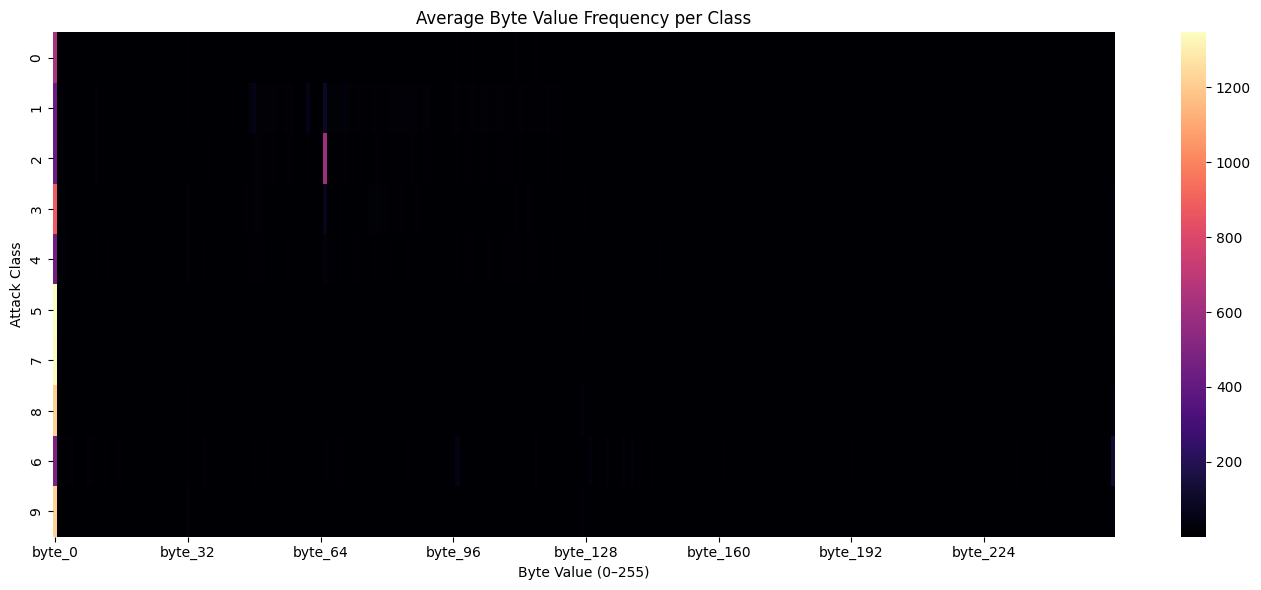

In [17]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_byte_freq, cmap='magma', xticklabels=32)
plt.title("Average Byte Value Frequency per Class")
plt.xlabel("Byte Value (0–255)")
plt.ylabel("Attack Class")
plt.tight_layout()
plt.savefig("byte_frequency_per_class_heatmap.png", dpi=300)
plt.show()

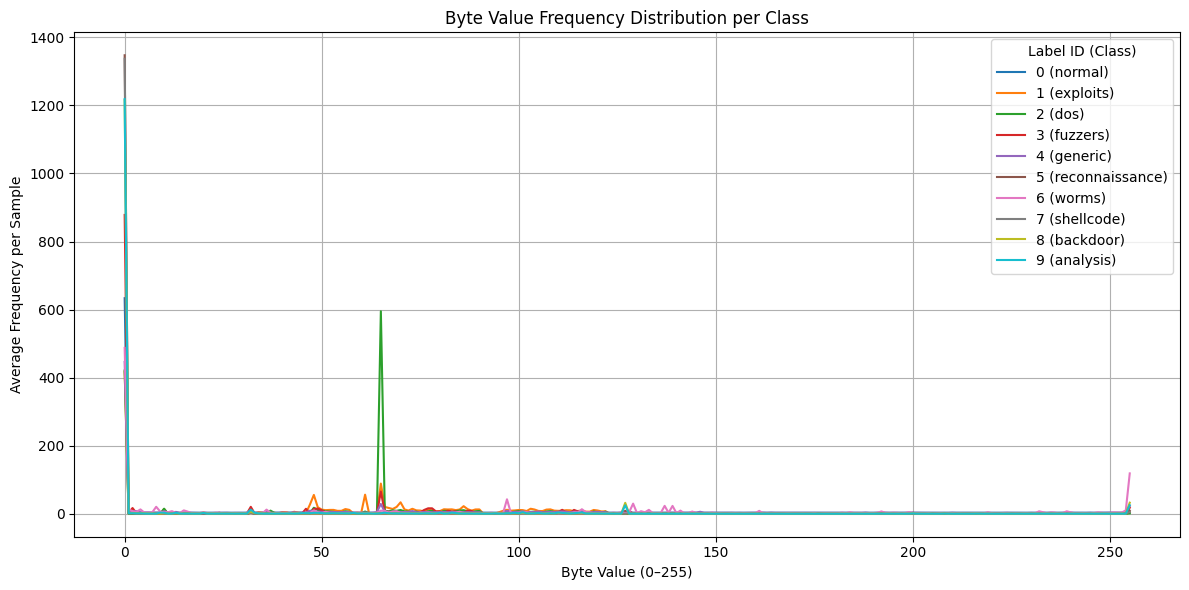

In [22]:
int_to_label = {
    0: 'normal',
    1: 'exploits',
    2: 'dos',
    3: 'fuzzers',
    4: 'generic',
    5: 'reconnaissance',
    6: 'worms',
    7: 'shellcode',
    8: 'backdoor',
    9: 'analysis'
}

plt.figure(figsize=(12, 6))

for label_id in range(10):
    label_name = int_to_label[label_id]
    plt.plot(range(256), df_byte_freq.loc[label_id], label=f"{label_id} ({label_name})")

plt.title("Byte Value Frequency Distribution per Class")
plt.xlabel("Byte Value (0–255)")
plt.ylabel("Average Frequency per Sample")
plt.legend(title="Label ID (Class)")
plt.grid(True)
plt.tight_layout()
plt.savefig("byte_value_frequency_per_class.png", dpi=300)
plt.show()